In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn

  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)


You should consider upgrading via the 'c:\users\yashp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


## Cell 1: Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## Cell 2: Load the Dataset

In [3]:
data = pd.read_csv('train.csv')

## Cell 3: Explore the Data

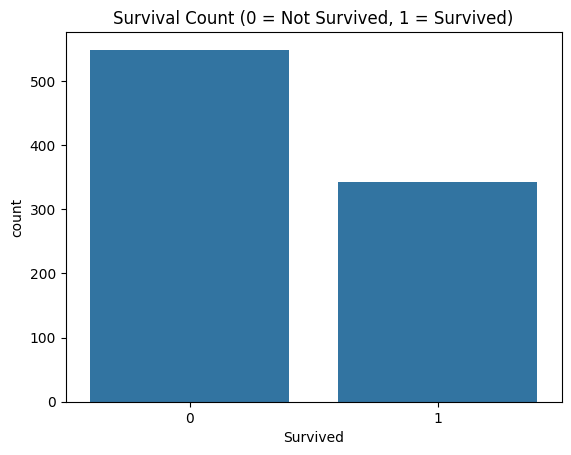

In [10]:
# Explore the dataset with data visualization
# Countplot of survivors
sns.countplot(x='Survived', data=data)
plt.title('Survival Count (0 = Not Survived, 1 = Survived)')
plt.show()

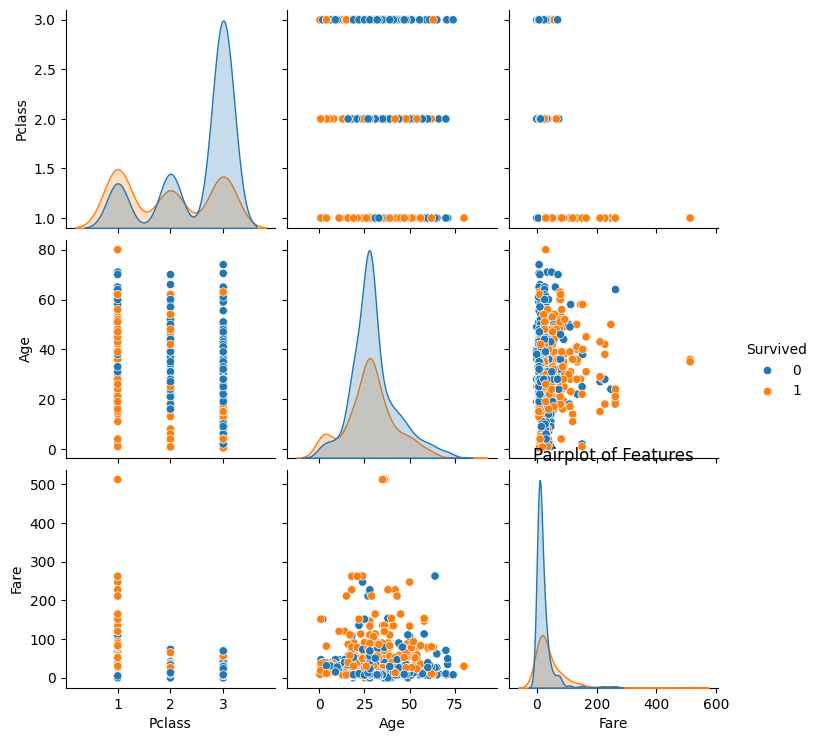

In [11]:
# Pairplot to visualize relationships between features
sns.pairplot(data[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.title('Pairplot of Features')
plt.show()

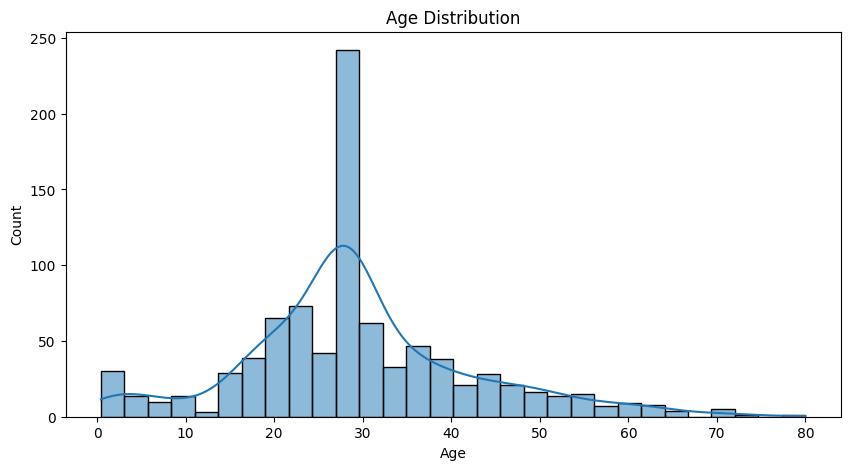

In [13]:
# Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


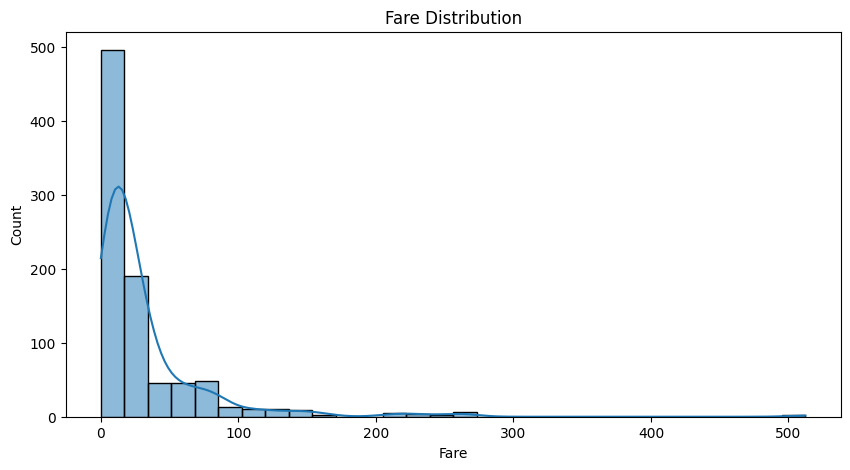

In [14]:
# Fare distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

## Cell 4: Data Preprocessing

In [5]:
# Handle missing data
data.fillna({'Age': data['Age'].median(), 'Embarked': data['Embarked'].mode()[0]}, inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Select features
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

## Cell 5: Data Splitting

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Cell 6: Model Building (Random Forest Classifier)

In [7]:
# Initialize and train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Cell 7: Model Evaluation

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

Accuracy: 0.82
Confusion Matrix:
[[92 13]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## Conclusion

random forest classifier achieved an accuracy of 82% on the test data. The confusion matrix, precision, recall, and F1-score provide additional insights into the model's performance:

The confusion matrix indicates that there were 92 true negatives, 55 true positives, 13 false positives, and 19 false negatives.
Precision for class 0 (Not Survived) is 0.83, meaning that of the predicted "Not Survived" instances, 83% were correct.
Precision for class 1 (Survived) is 0.81, indicating that of the predicted "Survived" instances, 81% were correct.
Recall for class 0 is 0.88, meaning that 88% of the actual "Not Survived" instances were correctly predicted.
Recall for class 1 is 0.74, indicating that 74% of the actual "Survived" instances were correctly predicted.
The F1-score is a balance between precision and recall, providing an overall measure of the model's performance.
Overall, the model has achieved a good balance between precision and recall, indicating that it is performing well in predicting both survival and non-survival. The accuracy of 82% is a solid result for a classification model.